# Homework 4 Assignment 1: 

Directions from Dr. Bianco : https://github.com/fedhere/PUI2018_fb55/tree/master/HW4_fb55

And the skeleton notebook is also from Dr. Bianco (@fedhere)

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means            

In [1]:
# import libraries
from __future__ import print_function
import pylab as pl
import seaborn
from scipy.optimize import curve_fit, minimize
import numpy as np
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# seeding for reproducibility
np.random.seed(303)

## 1. Normal Distribution


Text(0.5,1,'')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


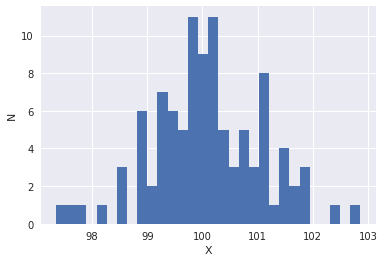

In [14]:
##your code here...

## starting with a single gausian distribution
np.random.normal(mymean, 1, 100)

pl.hist(np.random.normal(mymean, 1, 100), bins = 30)
pl.ylabel('N')
pl.xlabel('X')
pl.title('')


Figure 4: [...]

In [15]:
print("Normal Mean: %.2f, standard deviation: %.2f" % ((np.random.normal(mymean, 1, 100)).mean(), +
                                                       (np.random.normal(mymean, 1, 100)).std()))

Normal Mean: 99.93, standard deviation: 0.92


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


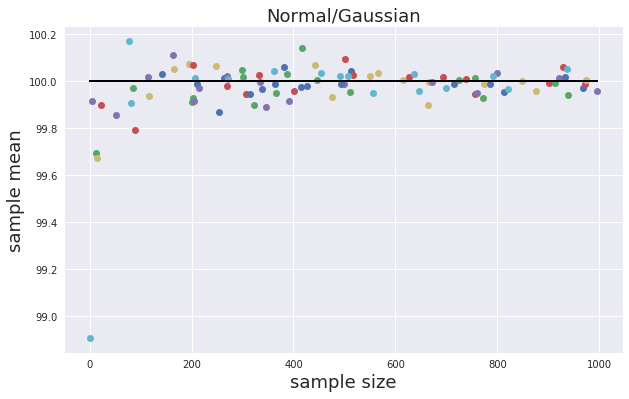

In [24]:
## Now scale this to 100 Normal Distributions

## append into the md dictionary with the Normal Gaussian distribution
md['gaus'] = {}

## using a loop to create 100  samples of different N sizes normal distribution

for i in mysize:
    md['gaus'][i] = np.random.normal(mymean, 1, i)
    
## create the means key for the gaussian distribution for plotting
md['gaus']['means'] = {}

axgaus_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for i in md['gaus']:
    if not type(i) == str:
        md['gaus']['means'][i] = md['gaus'][i].mean()
        #and plot it
        axgaus_mu_n.plot(i, md['gaus']['means'][i], 'o')
        axgaus_mu_n.set_xlabel('sample size', fontsize=18)
        axgaus_mu_n.set_ylabel('sample mean', fontsize=18)
        axgaus_mu_n.set_title('Normal/Gaussian', fontsize=18)
        axgaus_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


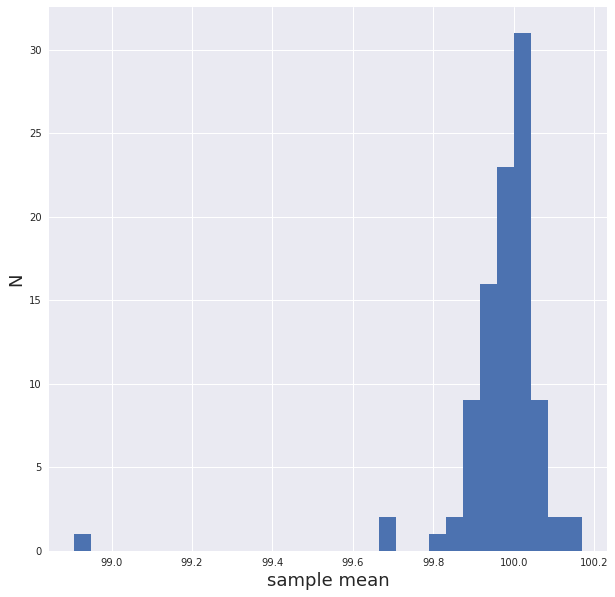

In [28]:
gaus_means = list(md['gaus']['means'].values())

pl.figure(figsize = (10,10))
pl.hist(gaus_means, bins = 30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# 2. Poisson distribution

Text(0.5,1,'')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


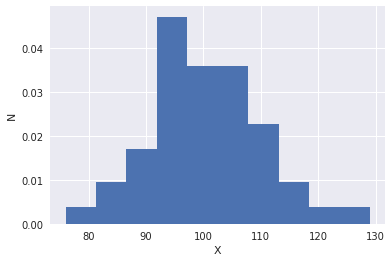

In [32]:
##your code here...

# ['pois']

## starting with a single poisson distribution
np.random.poisson(mymean, 100)

pl.hist(np.random.poisson(mymean, 100), normed=True)
pl.ylabel('N')
pl.xlabel('X')
pl.title('')

In [33]:
print("Poisson Mean: %.2f, standard deviation: %.2f" % ((np.random.poisson(mymean, 100)).mean(), +
                                                        (np.random.poisson(mymean, 100)).std()))

Poisson Mean: 99.72, standard deviation: 10.06


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


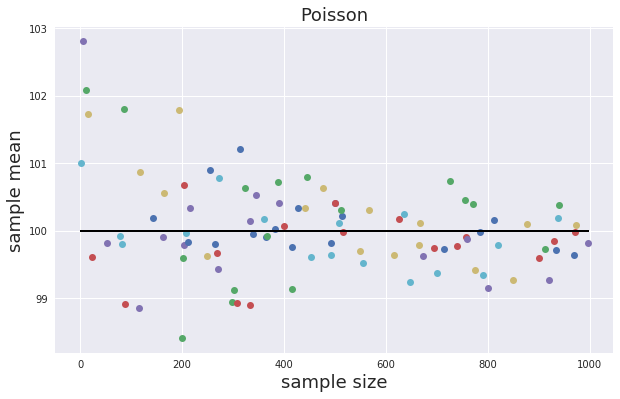

In [35]:
## Now scale this to 100 Poisson Distributions

## append into the md dictionary with the Normal Gaussian distribution
md['pois'] = {}

## using a loop to create 100  samples of different N sizes normal distribution

for i in mysize:
    md['pois'][i] = np.random.poisson(mymean, i)
    
## create the means key for the gaussian distribution for plotting
md['pois']['means'] = {}

axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for i in md['pois']:
    if not type(i) == str:
        md['pois']['means'][i] = md['pois'][i].mean()
        #and plot it
        axpois_mu_n.plot(i, md['pois']['means'][i], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')


Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


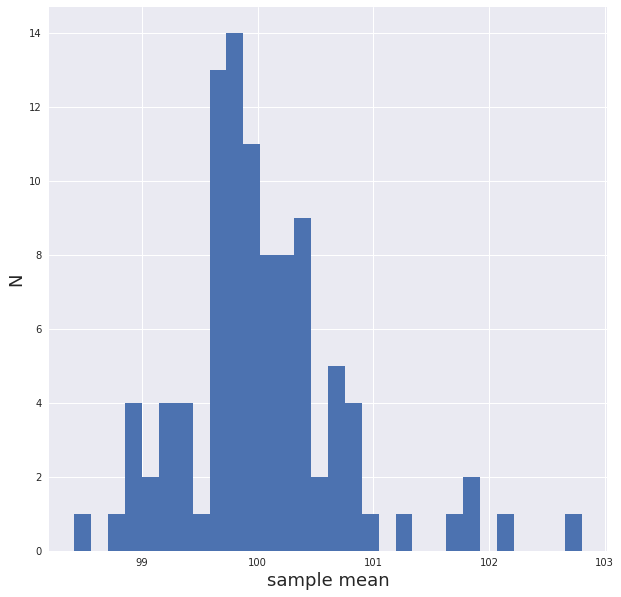

In [36]:
pois_means = list(md['pois']['means'].values())

pl.figure(figsize = (10,10))
pl.hist(pois_means, bins = 30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# 3. Binomial distribution

Text(0.5,1,'')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


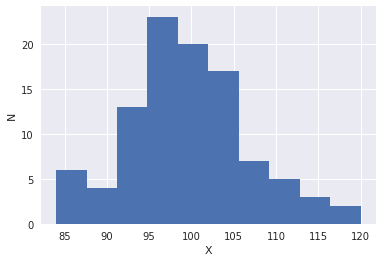

In [37]:
##your code here...
#  ['binomial']

## starting with a single poisson distribution
np.random.binomial(mymean*2, .5, 100)

pl.hist(np.random.binomial(mymean*2, .5, 100))
pl.ylabel('N')
pl.xlabel('X')
pl.title('')

In [38]:
print("Binomial Mean: %.2f, standard deviation: %.2f" % ((np.random.binomial(mymean*2, .5, 100)).mean(), +
                                                         (np.random.binomial(mymean*2, .5, 100)).std()))

Binomial Mean: 99.11, standard deviation: 6.00


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


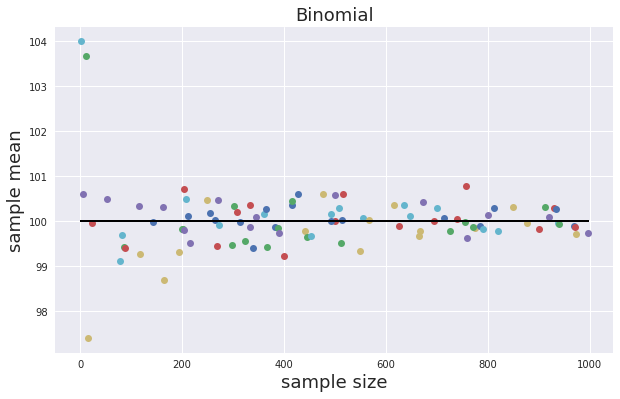

In [39]:
## Now scale this to 100 binomial Distributions

## append into the md dictionary with the binomial distribution
md['binomial'] = {}

## using a loop to create 100  samples of different N sizes normal distribution

for i in mysize:
    md['binomial'][i] = np.random.binomial(mymean*2, 0.5, i)
    
## create the means key for the gaussian distribution for plotting
md['binomial']['means'] = {}

axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for i in md['binomial']:
    if not type(i) == str:
        md['binomial']['means'][i] = md['binomial'][i].mean()
        #and plot it
        axbinomial_mu_n.plot(i, md['binomial']['means'][i], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


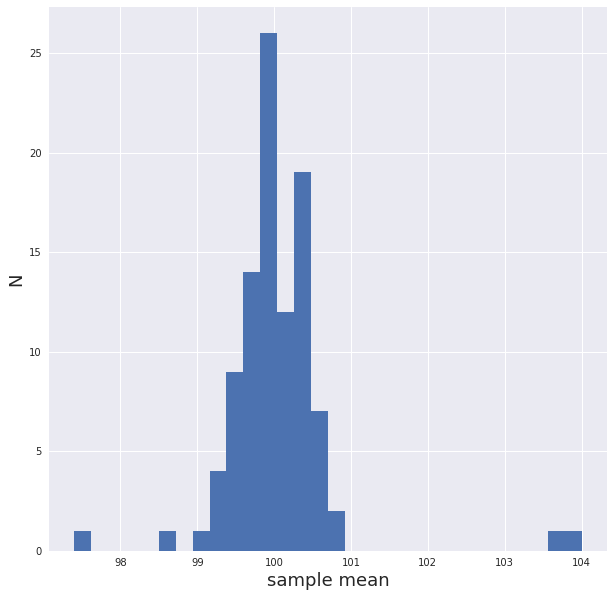

In [52]:
binomial_means = list(md['binomial']['means'].values())

pl.figure(figsize = (10,10))
pl.hist(binomial_means, bins = 30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# 4. Chi-Squared Distribution

In [3]:
#distributions
distributions = ['chisq']

### and which mean to give it

In [4]:
# This is the sample mean
mymean = 100

### Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html

http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [5]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

### Using a dictionary to host all the different types of distributions.

Text(0.5,0,'x')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


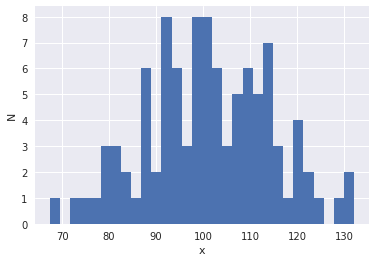

In [6]:
# md is the main dictionary
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')

### Figure 1: Chi sq distribution: df = 100, N=100

### let numpy calculate what the mean and stdev of this distribution are

In [7]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 101.07, standard deviation: 13.28


### Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000)

In [8]:
mysize = (np.random.rand(100) * 1000).astype(int)
print (mysize, mysize.shape)

[115 912 382 301 516  89 391 739 820 476 204 511 500 323 143 215 364 513
 666   1 507  86 203 299 366 269 849 264 195 901 269 415  52 929 500 550
 996 207 453 254 725 202  15 937  82 626 339 163 555   5 785 493 200 361
 446 492 334 920 566 757 427 973 615 647 812 165  12 791 211 800 442 971
 501 968 700  23 314 249 939 771 694 270 756 333 933 416 774 117 714 636
 346 401 388 876 664  78 272 672 307 759] (100,)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


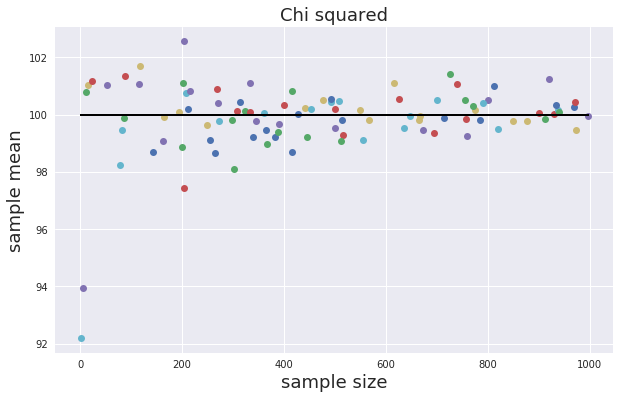

In [9]:
# overwrite the md dictionary
md['chisq'] = {}

# using a loop to append into the dictionary
for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later
md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 2: [describe what you see and how it relates to the law of large numbers]

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


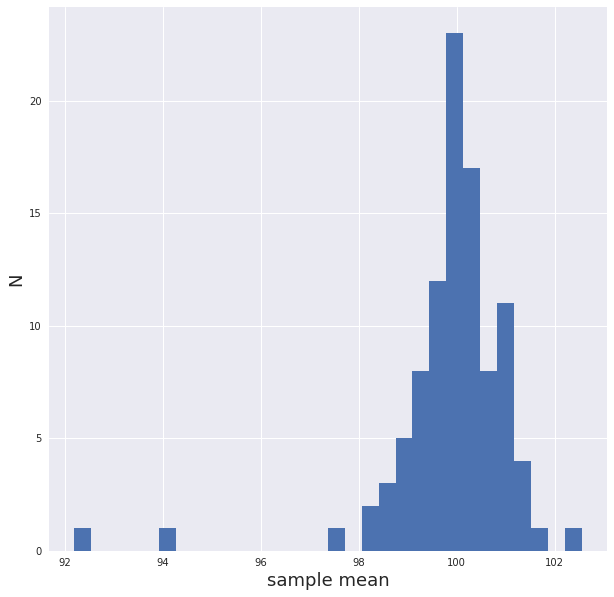

In [54]:
chisq_means = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(chisq_means,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

### Figure 3: [...]

# 5. Lognormal Distribution

Text(0.5,1,'')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


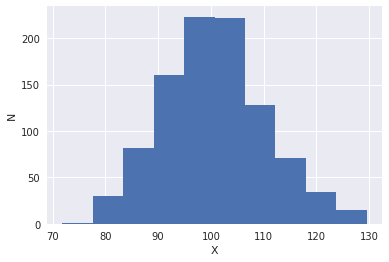

In [40]:
##your code here...

# distributions = ['lnorm']

## starting with a single lnorm distribution
np.random.lognormal(4.605, .1, np.random.randint(11,2000))

pl.hist(np.random.lognormal(4.605, .1, np.random.randint(11,2000)))
pl.ylabel('N')
pl.xlabel('X')
pl.title('')

In [49]:
print("Lognormal Mean: ", str(np.random.lognormal(4.605, .1, 100).mean()))

Lognormal Mean:  101.253872221


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


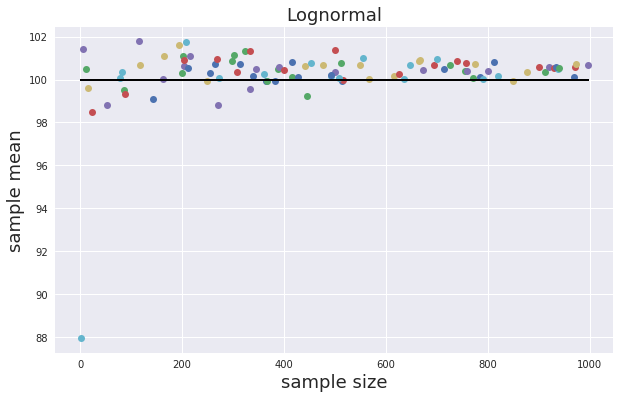

In [51]:
## Now scale this to 100 lognormal Distributions

## append into the md dictionary with the lognormal distribution
md['lnorm'] = {}

## using a loop to create 100  samples of different N sizes lognormal distribution

for i in mysize:
    md['lnorm'][i] = np.random.lognormal(4.605, 0.1, i)
    
## create the means key for the gaussian distribution for plotting
md['lnorm']['means'] = {}

axlnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for i in md['lnorm']:
    if not type(i) == str:
        md['lnorm']['means'][i] = md['lnorm'][i].mean()
        #and plot it
        axlnorm_mu_n.plot(i, md['lnorm']['means'][i], 'o')
        axlnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axlnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axlnorm_mu_n.set_title('Lognormal', fontsize=18)
        axlnorm_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


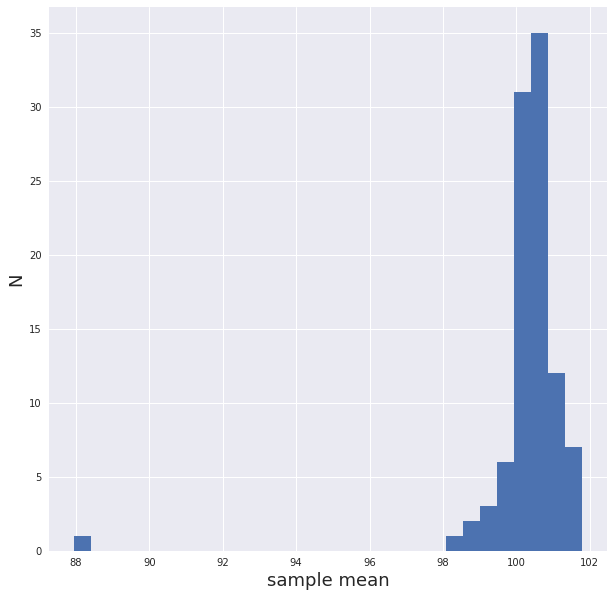

In [53]:
lnorm_means = list(md['lnorm']['means'].values())

pl.figure(figsize = (10,10))
pl.hist(lnorm_means, bins = 30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

# 6. PLOT the distributions of all sample means (together for all distributions)

Text(0.5,1,'Distribution of All Sample Means from Gaussian, Poisson, Binomial, Chi-Squared, & Lognormal')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


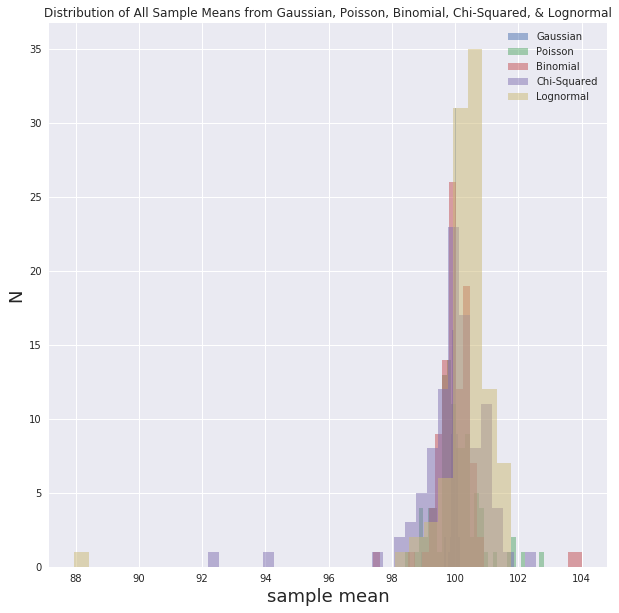

In [63]:
pl.figure(figsize = (10,10))
pl.hist(gaus_means, bins = 30, label = 'Gaussian', alpha = 0.5, align = 'mid') # Normal Distribution Means
pl.hist(pois_means, bins = 30, label = 'Poisson', alpha = 0.5, align = 'mid') # Poisson Distribution Means
pl.hist(binomial_means, bins = 30, label = 'Binomial', alpha = 0.5, align = 'mid') # Binomial Distribution Means
pl.hist(chisq_means,bins=30, label = 'Chi-Squared', alpha = 0.5, align = 'mid') # Chisquared Distribution Means
pl.hist(lnorm_means, bins = 30, label = 'Lognormal', alpha = 0.5, align = 'mid') # Lognormal Distribution Means
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.legend(loc = 'best')
pl.title('Distribution of All Sample Means from Gaussian, Poisson, Binomial, Chi-Squared, & Lognormal')

# Extra Credit - Fit Gaussian to All Sample Means

Text(0,0.5,'N')

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


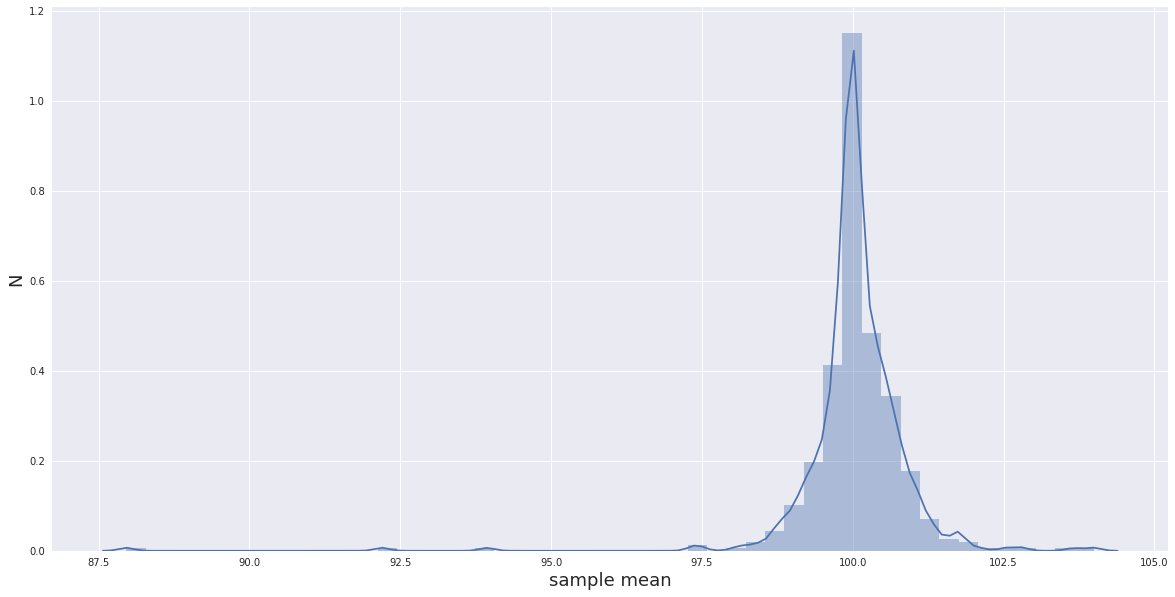

In [96]:
# calculat gaus_means + pois_means + binomial_means + chisq_means + lnorm_means
pl.figure(figsize = (20,10))
seaborn.distplot(all_means, hist=True)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)